# Constant cut-off test of PS_Fullmodel_1step by LBNL (Slimming level 1)

Setteing

In [1]:
from sample_algorithm.onestepSim_LBNL import runQuantum
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [2]:
from transpiler.optimization import slim
example1 = slim.circuit_optimization( circuit=circuit_LBNL1, slim_level=1, work_register = 'w', cut='high')
circuit_LBNL1_op = example1.slim()
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [3]:
from qiskit import(
  QuantumCircuit,QuantumRegister,ClassicalRegister,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

In [4]:
import math

In [11]:
from qiskit import *
def statevector(circ):
    circ.remove_final_measurements()
    simulator = Aer.get_backend('statevector_simulator')
    job = execute(circ, simulator)
    result = job.result()
    statevector = result.get_statevector(circ)
    return qiskit.quantum_info.Statevector(statevector).probabilities_dict()

## Measurement of bases by a simulator

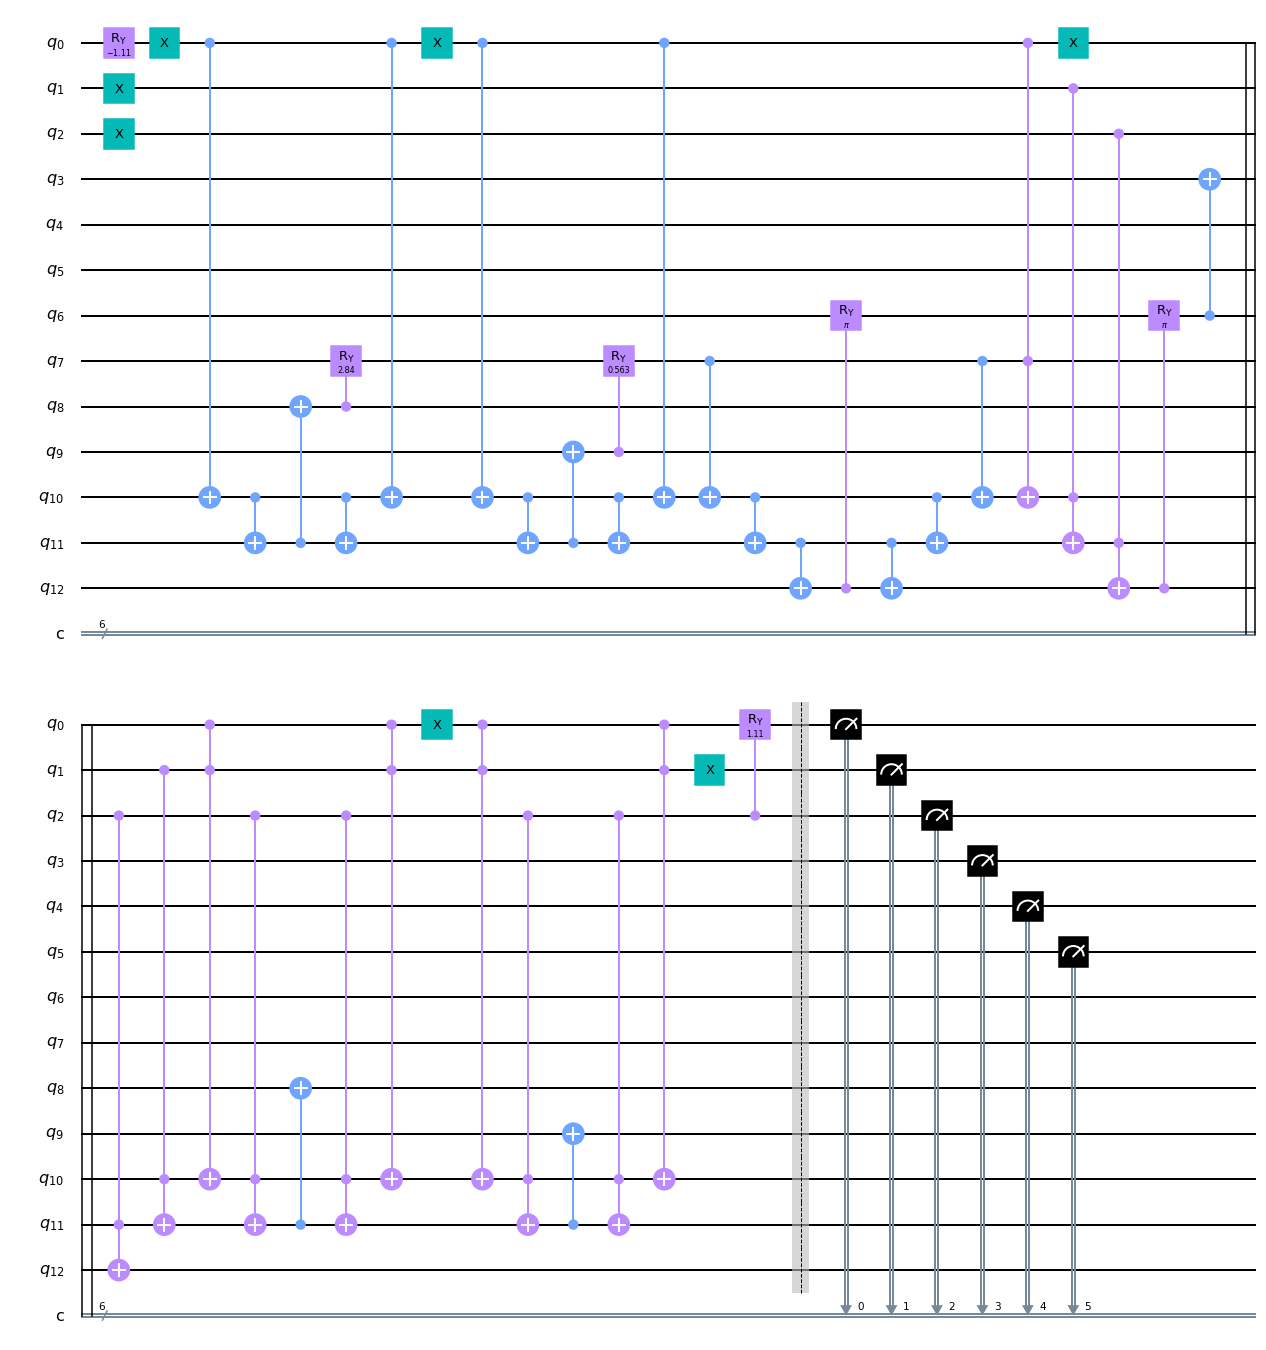

In [6]:
qc = QuantumCircuit(13,6)
qc.ry(-1.11,0)
qc.x(0)
qc.x(1)
qc.x(2)

qc.cx(0,10)
qc.cx(10,11)
qc.cx(11,8)
qc.cx(10,11)
qc.cx(0,10)
qc.cry(2.84,8,7)

qc.x(0)
qc.cx(0,10)
qc.cx(10,11)
qc.cx(11,9)
qc.cx(10,11)
qc.cx(0,10)
qc.cry(0.563,9,7)


qc.cx(7,10)
qc.cx(10,11)
qc.cx(11,12)
qc.cry(math.pi,12,6)
qc.cx(11,12)
qc.cx(10,11)
qc.cx(7,10)

qc.ccx(0,7,10)
qc.ccx(1,10,11)
qc.ccx(2,11,12)
qc.cry(math.pi,12,6)
qc.cx(6,3)
qc.x(0)
qc.ccx(2,11,12)
qc.ccx(1,10,11)
qc.ccx(0,1,10)

qc.ccx(2,10,11)
qc.cx(11,8)
qc.ccx(2,10,11)
qc.ccx(0,1,10)
qc.x(0)
qc.ccx(0,1,10)
qc.ccx(2,10,11)
qc.cx(11,9)
qc.ccx(2,10,11)
qc.ccx(0,1,10)

qc.x(1)
qc.cry(1.11,2,0)

qc.barrier()
for n in range(6):
    qc.measure(n,n)

qc.draw(output='mpl')

In [10]:
statevector(qc)

{'0000000000100': 0.140814520533503,
 '0000000000101': 0.13172801019336733,
 '0000001001100': 2.882251524864498e-33,
 '0000001001101': 1.9756037193808357e-33,
 '0000010000100': 1.0763150347046623e-31,
 '0000010000101': 3.1019974954429826e-32,
 '0000011001100': 0.5099867666920013,
 '0000011001101': 0.19604265373891988,
 '0011110000100': 0.005949910071608245,
 '0011110000101': 0.015478138770599881,
 '0011111001100': 1.203706215242022e-33,
 '0011111001101': 1.733336949948512e-33}

In [18]:
print(81920*(0.140814520533503+0.005949910071608245))
print(81920*(0.13172801019336733+0.015478138770599881))
print(81920*0.5099867666920013)
print(81920*0.19604265373891988)

12022.942155170713
12059.127723128195
41778.11592740874
16059.814194292318


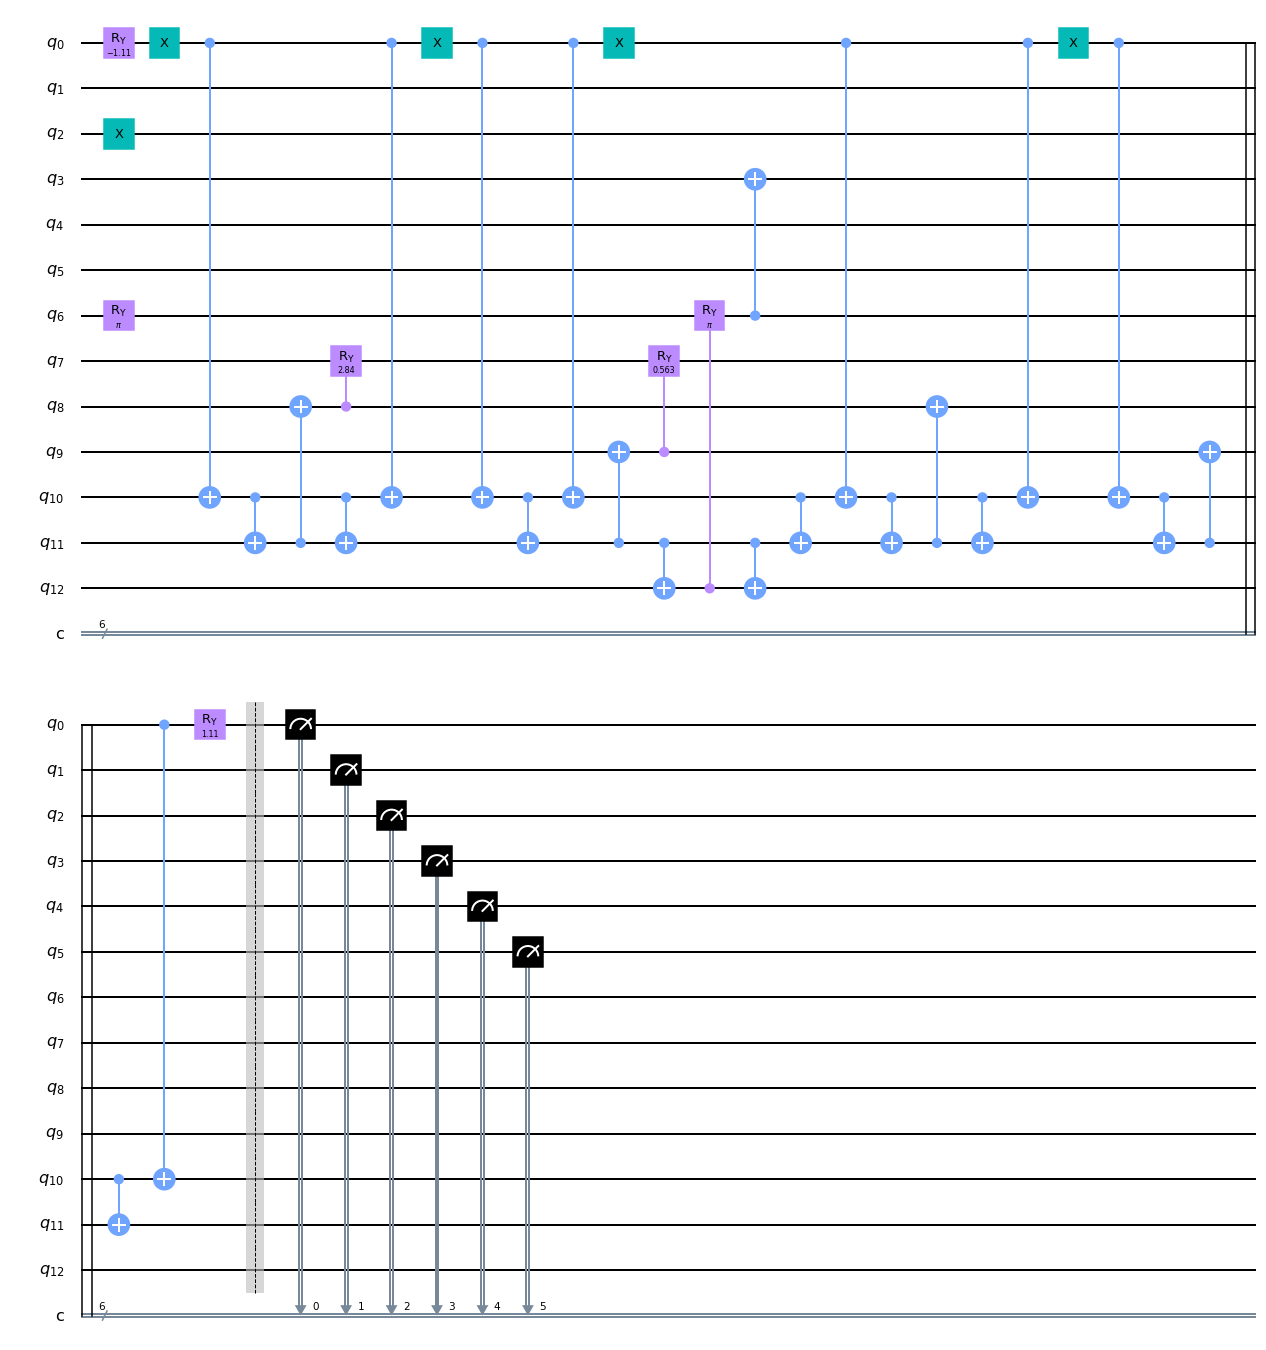

In [21]:
qc1 = QuantumCircuit(13,6)
qc1.ry(-1.11,0)
qc1.x(0)
qc1.x(2)

qc1.cx(0,10)
qc1.cx(10,11)
qc1.cx(11,8)
qc1.cx(10,11)
qc1.cx(0,10)
qc1.cry(2.84,8,7)

qc1.x(0)
qc1.cx(0,10)
qc1.cx(10,11)
qc1.cx(0,10)
qc1.cx(11,9)
qc1.cry(0.563,9,7)
qc1.x(0)

qc1.ry(math.pi,6)

qc1.cx(11,12)
qc1.cry(math.pi,12,6)
qc1.cx(11,12)
qc1.cx(10,11)
qc1.cx(0,10)
qc1.cx(6,3)

qc1.cx(10,11)
qc1.cx(11,8)
qc1.cx(10,11)
qc1.cx(0,10)

qc1.x(0)
qc1.cx(0,10)
qc1.cx(10,11)
qc1.cx(11,9)
qc1.cx(10,11)
qc1.cx(0,10)

qc1.ry(1.11,0)

qc1.barrier()
for n in range(6):
    qc1.measure(n,n)

qc1.draw(output='mpl')

{'000100': 6259, '000101': 16279, '001100': 42997, '001101': 16425}


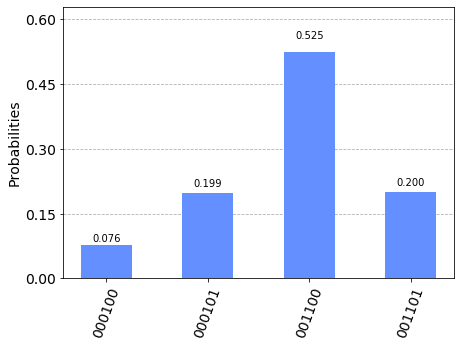

In [22]:
circuit=qc1
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=81960)
result = job.result()
counts = result.get_counts(circuit)

print(counts)
plot_histogram(counts,number_to_keep=None)

In [14]:
statevector(qc1)

{'0000000000100': 4.333342374871281e-34,
 '0000000000101': 1.925929944387236e-34,
 '0000001001100': 0.011774957796610572,
 '0000001001101': 0.0045263801433213235,
 '0000010000100': 3.0814879110195774e-33,
 '0000010000101': 2.4697971706721237e-62,
 '0000011001100': 0.5099867666920013,
 '0000011001101': 0.19604265373891977,
 '0101100000100': 0.07115029767529708,
 '0101100000101': 0.18509089511164115,
 '0101101001100': 4.1485714607978804e-33,
 '0101101001101': 9.709266606047299e-33,
 '0101110000100': 0.005949910071608236,
 '0101110000101': 0.015478138770599866,
 '0101111001100': 5.915172440129917e-33,
 '0101111001101': 1.9491434344258413e-32}

In [19]:
print(81920*(0.07115029767529708+0.005949910071608236))
print(81920*(0.18509089511164115+0.015478138770599866))
print(81920*(0.011774957796610572+0.5099867666920013))
print(81920*(0.0045263801433213235+0.19604265373891977))

6316.049018626483
16430.615255633184
42742.72047010708
16430.61525563319


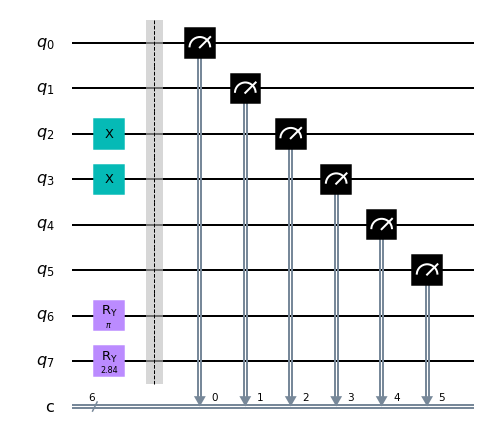

In [23]:
qc2 = QuantumCircuit(8,6)

qc2.x(2)
qc2.x(3)

qc2.ry(math.pi,6)
qc2.ry(2.84,7)


qc2.barrier()
for n in range(6):
    qc2.measure(n,n)

qc2.draw(output='mpl')

In [25]:
statevector(qc2)

{'00001100': 8.461529141106394e-35,
 '01001100': 0.022567691810186828,
 '10001100': 3.66478416524358e-33,
 '11001100': 0.9774323081898131}

In [26]:
print(81920*(0.022567691810186828+0.9774323081898131))

81919.99999999999


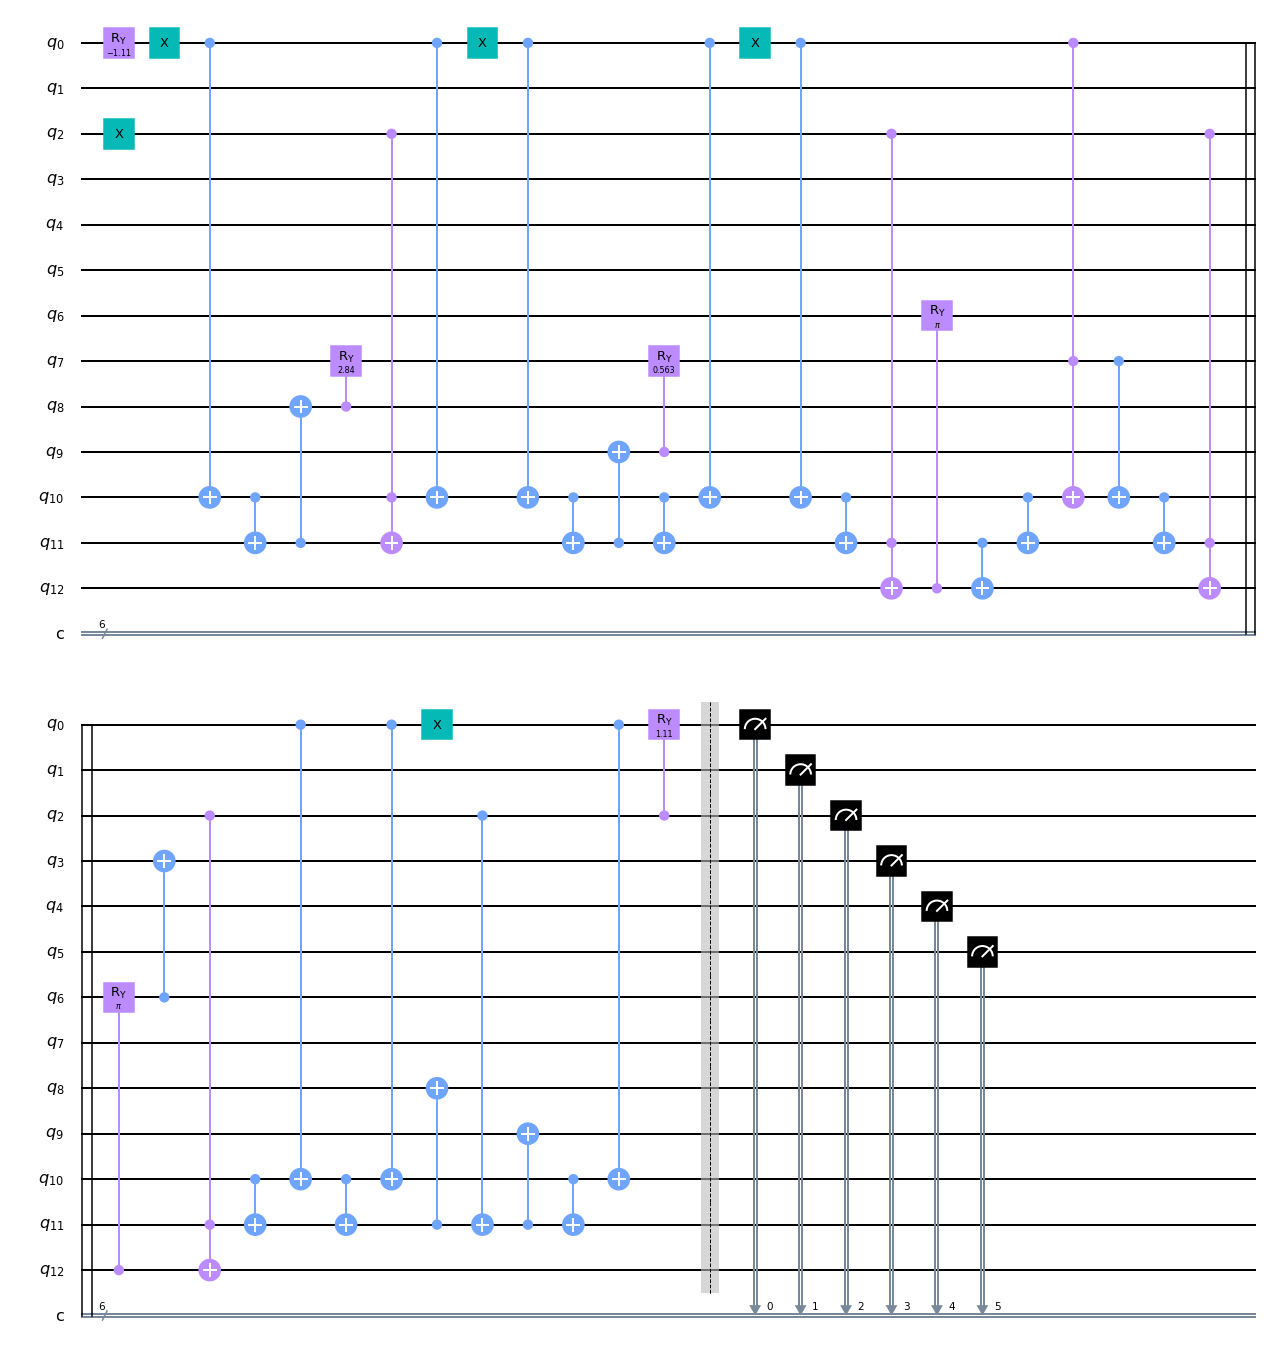

In [32]:
qc3 = QuantumCircuit(13,6)
qc3.ry(-1.11,0)
qc3.x(0)
qc3.x(2)

qc3.cx(0,10)
qc3.cx(10,11)
qc3.cx(11,8)
qc3.cry(2.84,8,7)
qc3.ccx(2,10,11)
qc3.cx(0,10)


qc3.x(0)
qc3.cx(0,10)
qc3.cx(10,11)
qc3.cx(11,9)
qc3.cx(10,11)
qc3.cx(0,10)
qc3.cry(0.563,9,7)

qc3.x(0)
qc3.cx(0,10)
qc3.cx(10,11)
qc3.ccx(2,11,12)
qc3.cry(math.pi,12,6)
qc3.cx(11,12)
qc3.cx(10,11)
qc3.ccx(0,7,10)

qc3.cx(7,10)
qc3.cx(10,11)
qc3.ccx(2,11,12)
qc3.cry(math.pi,12,6)
qc3.cx(6,3)
qc3.ccx(2,11,12)
qc3.cx(10,11)
qc3.cx(0,10)


qc3.cx(10,11)
qc3.cx(0,10)
qc3.cx(11,8)

qc3.x(0)
qc3.cx(2,11)
qc3.cx(11,9)
qc3.cx(10,11)
qc3.cx(0,10)

qc3.cry(1.11,2,0)

qc3.barrier()
for n in range(6):
    qc3.measure(n,n)

qc3.draw(output='mpl')

In [28]:
statevector(qc3)

{'0011100000100': 0.011774957796610613,
 '0011100000101': 0.004526380143321343,
 '0011101001100': 1.733336949948513e-33,
 '0011101001101': 1.9259299443872367e-34,
 '0011110000100': 0.5099867666920013,
 '0011110000101': 0.19604265373891983,
 '0011111001100': 1.5099290763995925e-31,
 '0011111001101': 3.774822690998981e-32,
 '0101110000100': 8.596063361134219e-34,
 '0101110000101': 4.247278948247731e-34,
 '0101111001100': 0.005949910071608242,
 '0101111001101': 0.015478138770599875,
 '0110000000100': 0.07115029767529711,
 '0110000000101': 0.1850908951116412,
 '0110001001100': 4.1485714607978757e-33,
 '0110001001101': 2.775918806253241e-33}

In [30]:
print(81920*(0.011774957796610613+0.5099867666920013+0.0711502976752971))
print(81920*(0.004526380143321343+0.19604265373891983+0.1850908951116412))
print(81920*0.005949910071608242)
print(81920*0.015478138770599875)

48571.35285566743
31593.26138317884
487.4166330661472
1267.9691280875418


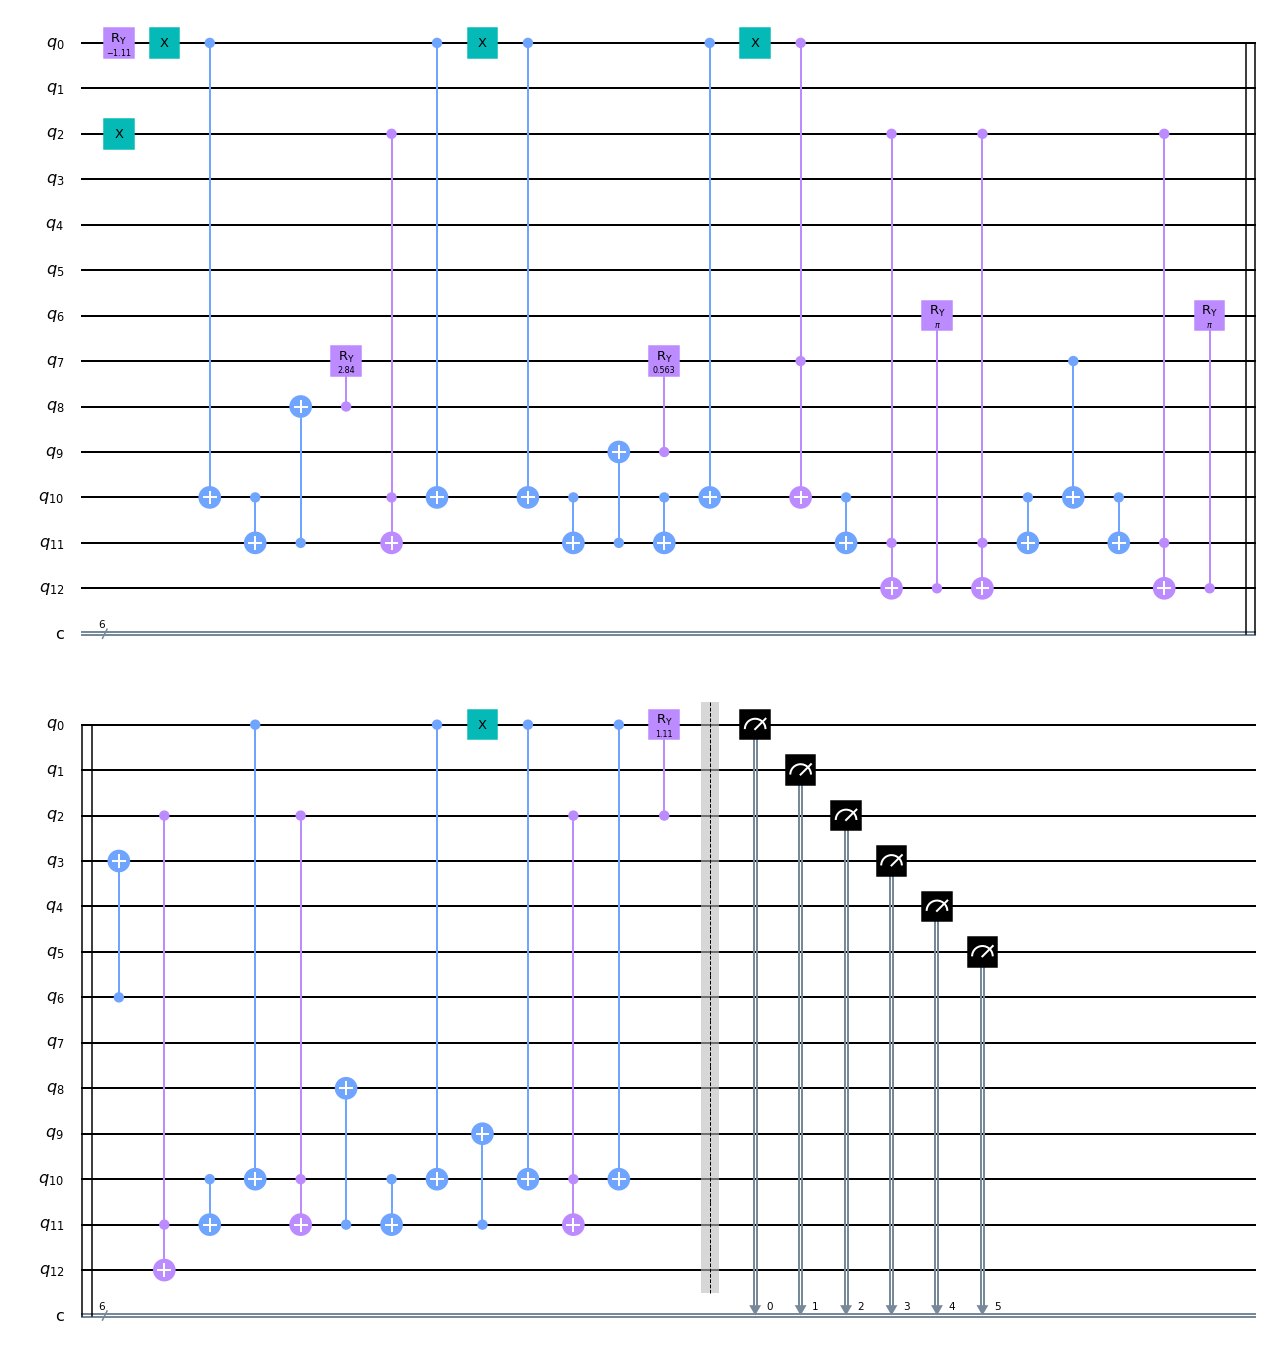

In [38]:
qc4 = QuantumCircuit(13,6)
qc4.ry(-1.11,0)
qc4.x(0)
qc4.x(2)

qc4.cx(0,10)
qc4.cx(10,11)
qc4.cx(11,8)
qc4.cry(2.84,8,7)
qc4.ccx(2,10,11)
qc4.cx(0,10)


qc4.x(0)
qc4.cx(0,10)
qc4.cx(10,11)
qc4.cx(11,9)
qc4.cx(10,11)
qc4.cx(0,10)
qc4.cry(0.563,9,7)

qc4.x(0)
qc4.ccx(0,7,10)
qc4.cx(10,11)
qc4.ccx(2,11,12)
qc4.cry(math.pi,12,6)
qc4.ccx(2,11,12)
qc4.cx(10,11)

qc4.cx(7,10)
qc4.cx(10,11)
qc4.ccx(2,11,12)
qc4.cry(math.pi,12,6)
qc4.cx(6,3)
qc4.ccx(2,11,12)
qc4.cx(10,11)
qc4.cx(0,10)


qc4.ccx(2,10,11)
qc4.cx(11,8)
qc4.cx(10,11)
qc4.cx(0,10)

qc4.x(0)
qc4.cx(11,9)
qc4.cx(0,10)
qc4.ccx(2,10,11)
qc4.cx(0,10)

qc4.cry(1.11,2,0)

qc4.barrier()
for n in range(6):
    qc4.measure(n,n)

qc4.draw(output='mpl')

{'000100': 6736, '000101': 15674, '001100': 42233, '001101': 17317}


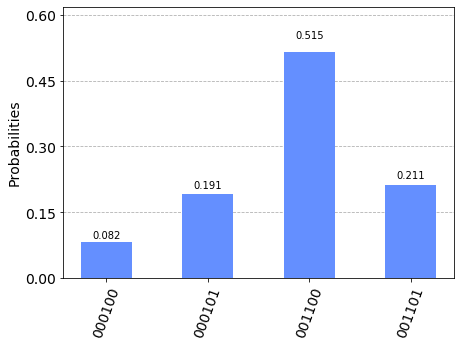

In [127]:
circuit=qc4
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=81960)
result = job.result()
counts = result.get_counts(circuit)

print(counts)
plot_histogram(counts,number_to_keep=None)

In [39]:
statevector(qc4)

{'0000000000100': 0.011774957796610613,
 '0000000000101': 0.004526380143321343,
 '0000001001100': 2.2474433006865395e-34,
 '0000001001101': 1.1603307760960654e-34,
 '0000010000100': 1.0763150347046623e-31,
 '0000010000101': 3.1019974954429826e-32,
 '0000011001100': 0.5099867666920013,
 '0000011001101': 0.19604265373891988,
 '0011110000100': 8.596063361134219e-34,
 '0011110000101': 4.247278948247731e-34,
 '0011111001100': 0.005949910071608242,
 '0011111001101': 0.015478138770599875,
 '0101000000100': 0.07115029767529711,
 '0101000000101': 0.1850908951116412,
 '0101001001100': 4.1485714607978757e-33,
 '0101001001101': 2.775918806253241e-33}

In [40]:
print(81920*(0.011774957796610613+0.07115029767529711))
print(81920*(0.004526380143321343+0.1850908951116412))
print(81920*(0.5099867666920013+0.005949910071608242))
print(81920*(0.19604265373891988+0.015478138770599875))

6793.236928258681
15533.447188886532
42265.532560474894
17327.78332237986
